# Hamoye Quiz - Stage B

In [55]:
# importing dependencies

import seaborn as sb
import pandas as pd

In [56]:
# importing dataset
df = pd.read_csv('energydata_complete.csv')

In [57]:
# assessing dataset
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


#### Wrangling dataset

In [58]:
# assessing dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
date           19735 non-null object
Appliances     19735 non-null int64
lights         19735 non-null int64
T1             19735 non-null float64
RH_1           19735 non-null float64
T2             19735 non-null float64
RH_2           19735 non-null float64
T3             19735 non-null float64
RH_3           19735 non-null float64
T4             19735 non-null float64
RH_4           19735 non-null float64
T5             19735 non-null float64
RH_5           19735 non-null float64
T6             19735 non-null float64
RH_6           19735 non-null float64
T7             19735 non-null float64
RH_7           19735 non-null float64
T8             19735 non-null float64
RH_8           19735 non-null float64
T9             19735 non-null float64
RH_9           19735 non-null float64
T_out          19735 non-null float64
Press_mm_hg    19735 non-null float64
RH_out         19735 n

- From the above result, we see our dataset contains no null values/missing data.
- All datatypes are equally appropriate. 
- Wrangling may not be required for this dataset.

In [59]:
# confirming there are zero NaNs in dataset

df.isnull().sum() #result should print 0

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

#### Preparing dataset

In [62]:
# removing 'date' and 'lights' columns from dataset

df.drop('lights', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)

In [63]:
# checking for removed columns 
# only 27 columns should remain

print(df.shape)

(19735, 27)


#### Normalizing & dropping datasets
- normalize the dataset using the MinMaxScaler after removing the following columns: [“date”, “lights”]. 
- The target variable is “Appliances”. Use a 70-30 train-test set split with a  random state of 42 (for reproducibility). 
- Run a multiple linear regression using the training set and evaluate your model on the test set.

In [83]:
# normalizing dataset using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

norm_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
feat_df = norm_df.drop(columns=['Appliances'])
df_target = norm_df['Appliances']

In [84]:
# splitting dataset into 70-30 train-test set.

from sklearn.linear_model import LinearRegression 

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(norm_df, df_target, test_size=0.3, random_state=42)

linear_model = LinearRegression()

In [85]:
# fitting model to train set
linear_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [86]:
# obtain predictions
predicted_values = linear_model.predict(x_test)

In [87]:
# Mean Absolute Error

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 3)

0.0

In [88]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 3) 

1.0

In [89]:
import numpy as np
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 3)

0.0

In [90]:
from sklearn.metrics import  mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3)

0.0

#### Preparing dataset

In [92]:
import seaborn as sns

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 27 columns):
Appliances     19735 non-null int64
T1             19735 non-null float64
RH_1           19735 non-null float64
T2             19735 non-null float64
RH_2           19735 non-null float64
T3             19735 non-null float64
RH_3           19735 non-null float64
T4             19735 non-null float64
RH_4           19735 non-null float64
T5             19735 non-null float64
RH_5           19735 non-null float64
T6             19735 non-null float64
RH_6           19735 non-null float64
T7             19735 non-null float64
RH_7           19735 non-null float64
T8             19735 non-null float64
RH_8           19735 non-null float64
T9             19735 non-null float64
RH_9           19735 non-null float64
T_out          19735 non-null float64
Press_mm_hg    19735 non-null float64
RH_out         19735 non-null float64
Windspeed      19735 non-null float64
Visibility     1973

In [99]:
#select a sample of the dataset
simple_linear_reg_df = df[['Appliances', 'Windspeed']].sample(10000, random_state=42)

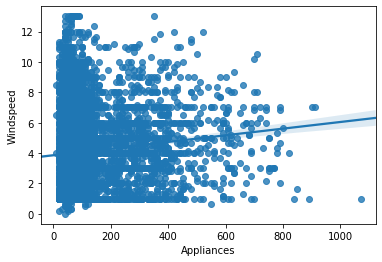

In [100]:
#regression plot
sb.regplot(x="Appliances", y="Windspeed",
            data=simple_linear_reg_df);

#### Answers to questions

### Questions 12 to 16

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 27 columns):
Appliances     19735 non-null int64
T1             19735 non-null float64
RH_1           19735 non-null float64
T2             19735 non-null float64
RH_2           19735 non-null float64
T3             19735 non-null float64
RH_3           19735 non-null float64
T4             19735 non-null float64
RH_4           19735 non-null float64
T5             19735 non-null float64
RH_5           19735 non-null float64
T6             19735 non-null float64
RH_6           19735 non-null float64
T7             19735 non-null float64
RH_7           19735 non-null float64
T8             19735 non-null float64
RH_8           19735 non-null float64
T9             19735 non-null float64
RH_9           19735 non-null float64
T_out          19735 non-null float64
Press_mm_hg    19735 non-null float64
RH_out         19735 non-null float64
Windspeed      19735 non-null float64
Visibility     1973

In [104]:
# building linear model

#select a sample of the dataset
simple_linear_reg_df = df[['T2', 'T6']].sample(19735, random_state=42)

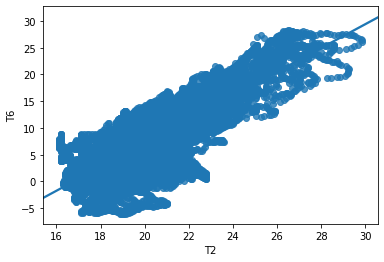

In [107]:
#regression plot
sb.regplot(x="T2", y="T6", data=simple_linear_reg_df);

In [113]:
from sklearn.linear_model import LinearRegression 

#Now, we split our dataset into the training and testing dataset. Recall that we had earlier segmented the features and target variables.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(feat_df, df_target, test_size=0.3, random_state=42)

linear_model = LinearRegression()

#fit the model to the training dataset
linear_model.fit(x_train, y_train)

#obtain predictions
predicted_values = linear_model.predict(x_test)

In [115]:
# r2 value in 2 dp

from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 2)

0.15

In [116]:
#MAE in 2 dp
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 2)

0.05

In [117]:
# rss in 2 dp

import numpy as np
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 2)

45.35

In [118]:
# rmse in 2 dp

from sklearn.metrics import  mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 2)

0.09

### Questions 13 to 20

In [138]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [139]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [140]:
#comparing the effects of regularisation

def get_weights_df(model, feat, col_name):
  weights = pd.Series(model.coef_, feat.columns).sort_values()
  weights_df = pd.DataFrame(weights).reset_index()
  weights_df.columns = ['Features', col_name]
  weights_df[col_name].round(3)
  return weights_df

linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')

final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')
final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight
0,RH_2,-0.456698,-0.401134,-0.000000
1,T_out,-0.321860,-0.250765,0.000000
2,T2,-0.236178,-0.193880,0.000000
3,T9,-0.189941,-0.188584,-0.000000
4,RH_8,-0.157595,-0.156596,-0.000110
5,RH_out,-0.077671,-0.050541,-0.049557
6,RH_7,-0.044614,-0.046291,-0.000000
7,RH_9,-0.039800,-0.041701,-0.000000
8,T5,-0.015657,-0.020727,-0.000000
9,T1,-0.003281,-0.021549,0.000000


In [135]:
from sklearn.linear_model import Ridge
ridge_reg2 = Ridge(alpha=0.4)
ridge_reg2.fit(x_train, y_train)

Ridge(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [137]:
#comparing the effects of regularisation

def get_weights_df(model, feat, col_name):
  weights = pd.Series(model.coef_, feat.columns).sort_values()
  weights_df = pd.DataFrame(weights).reset_index()
  weights_df.columns = ['Features', col_name]
  weights_df[col_name].round(3)
  return weights_df

linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
ridge_weights_df2 = get_weights_df(ridge_reg2, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')

final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')
final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight
0,RH_2,-0.456698,-0.411071,-0.000000
1,T_out,-0.321860,-0.262172,0.000000
2,T2,-0.236178,-0.201397,0.000000
3,T9,-0.189941,-0.188916,-0.000000
4,RH_8,-0.157595,-0.156830,-0.000110
5,RH_out,-0.077671,-0.054724,-0.049557
6,RH_7,-0.044614,-0.045977,-0.000000
7,RH_9,-0.039800,-0.041367,-0.000000
8,T5,-0.015657,-0.019853,-0.000000
9,T1,-0.003281,-0.018406,0.000000


In [142]:
from sklearn.linear_model import Lasso
lasso_reg2 = Lasso(alpha=0.001)
lasso_reg2.fit(x_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [143]:
# rmse in 2 dp

from sklearn.metrics import  mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 2)

0.09